In [2]:
%load_ext autoreload
%autoreload 2
import multiprocessing
import numpy as np

from utils.rw_utils import get_rw_representation, get_walk_representation

## plotting ###

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Create 3 populations

In [4]:
###### TOY DATA #######

from utils.toy_data import generate_toy_data, plot_population_sample

np.random.seed(17)
population_parameter=[dict(N=400, V=199, lam=1, height=10, width=10, depth=10, directions=[2,4], min_degree=-50, max_degree=50),
                       dict(N=400, V=199, lam=2, height=10, width=10,depth=10, directions=[2,4], min_degree=-50, max_degree=50),
                      dict(N=400, V=199, lam=3, height=10, width=10,depth=10, directions=[2,4], min_degree=-80, max_degree=100)]
_ , _ , neurons = generate_toy_data(population_parameter, with_pos=False)

KeyboardInterrupt: 

In [6]:
from utils.rw_utils import load_neurons
import os

neurons = load_neurons('./data/urban_data/neurons/soma_centered/', sort=False)

root, _, files = list(os.walk('./data/urban_data/neurons/soma_centered/'))[0]
sort_index = np.array(files).argsort()

neurons = np.array(neurons)[sort_index]


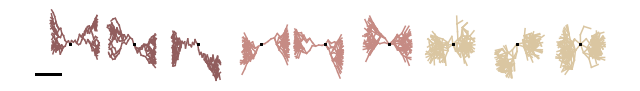

In [3]:
np.random.seed(11)
fig = plot_population_sample(population_parameter, n_samples=3)
fig.gca().set_aspect('equal')
fig.gca().axis('off')
fig.gca().plot([-7,-2],[-6,-6], c='k', linewidth=3)
plt.tight_layout()

In [8]:
# sample RANDOM walks

np.random.seed(17)

n_walks=256
N = len(neurons)
NUM_CORES = 15

for walk_length in [8,16,32]:
    rw_list = []
    with multiprocessing.Pool(NUM_CORES) as pool:
        rw_list += pool.map(get_rw_representation, neurons)
    RW_representation = np.array([e[0] for e in rw_list])
    
    with open('./data/urban_data/walks/soma_centered/walk_representation_%i.npy'%walk_length, 'wb') as f:
        #np.save(f, walk_representation)
        np.save(f, RW_representation)

In [4]:
# save neurons

for k, neuron in enumerate(neurons):
    neuron.write_to_swc('%i'%k, path='./data/toy_data/3_populations/neurons/')

## Create 5 populations

In [14]:

np.random.seed(17)
population_parameter=[dict(N=300, V=399, lam=1, height=10, width=10, depth=10, directions=[2,4], min_degree=-50, max_degree=50),
                       dict(N=300, V=399, lam=2, height=10, width=10,depth=10, directions=[2,4], min_degree=-80, max_degree=80),
                      dict(N=300, V=399, lam=2, height=10, width=10,depth=10, directions=[1,2,3,4], min_degree=-80, max_degree=80),
                      dict(N=300, V=399, lam=1, height=10, width=10, depth=10, directions=[1,3], min_degree=-50, max_degree=50),
                       dict(N=300, V=399, lam=2, height=10, width=10,depth=10, directions=[1,3], min_degree=-80, max_degree=80)
                     ]
codes_asc, codes_desc, neurons = generate_toy_data(population_parameter, with_pos=False)

AttributeError: 'NeuronTree' object has no attribute 'get_extent'

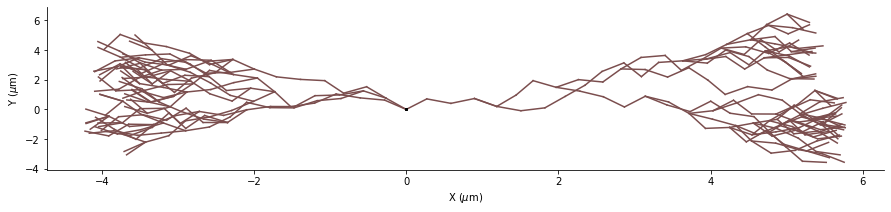

In [15]:
np.random.seed(11)
fig = plot_population_sample(population_parameter, n_samples=3)
fig.gca().set_aspect('equal')
fig.gca().axis('off')
fig.gca().plot([-7,-2],[-6,-6], c='k', linewidth=3)
plt.tight_layout()

In [18]:
# sample RANDOM walks

np.random.seed(17)

n_walks=256
N = len(neurons)
NUM_CORES = 15

for walk_length in [32]:
    rw_list = []
    with multiprocessing.Pool(NUM_CORES) as pool:
        rw_list += pool.map(get_rw_representation, neurons)
    RW_representation = np.array([e[0] for e in rw_list])
    
    with open('./data/toy_data/5_populations/walk_representation.npy', 'wb') as f:
        np.save(f, RW_representation)

In [19]:
# save neurons
for k, neuron in enumerate(neurons):
    neuron.write_to_swc('%i'%k, path='./data/toy_data/5_populations/neurons/')


## plot data

In [6]:
from utils.rw_utils import load_neurons
import os
#load in data
neurons = load_neurons('./data/toy_data/3_populations/neurons/', sort=False)

root, _, files = list(os.walk('./data/toy_data/3_populations/neurons/'))[0]
file_nr = [int(f[:-4]) for f in files]
sort_index = np.array(file_nr).argsort()

neurons = np.array(neurons)[sort_index]

In [7]:
np.random.seed(18)
n_samples = 3
labels = np.array([0]*400 + [1]*400 + [2]*400)
p1_index = np.random.choice(range(0,400), size=n_samples, replace=False)
p2_index = np.random.choice(range(400,800), size=n_samples, replace=False)
p3_index = np.random.choice(range(800,1200), size=n_samples, replace=False) 

type_indices = np.concatenate((p1_index, p2_index, p3_index))
type_indices.sort()

In [8]:
colors = sns.color_palette('pink', n_colors=4)
type_indices

array([   6,  196,  209,  646,  720,  776,  872,  935, 1197])

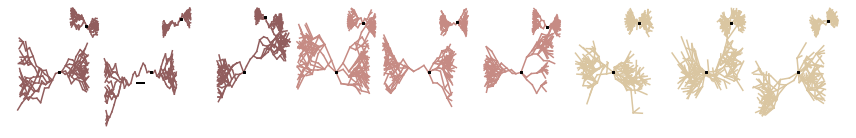

In [9]:

fig, axes = plt.subplots(1,9, sharex=True, sharey=True, figsize=(12,4))

for k, ix_ in enumerate(type_indices):
    
    c = colors[labels[ix_]]
    neurons[ix_].draw_2D(ax=axes[k], dendrite_color=c, projection='xz')
    axes[k].axis('off')
    axes[k].set_aspect('equal')
    axes[k].scatter(0, 0, c='k', marker='s', zorder=10, s=8)
    
    inset_axis = axes[k].inset_axes([.6,.8,.3,.3])
    neurons[ix_].draw_2D(ax=inset_axis, dendrite_color=c, projection='xy')
    inset_axis.scatter(0, 0, c='k', marker='s', zorder=10, s=8)
    inset_axis.axis('off')
    inset_axis.set_aspect('equal')
    
    if k == 1:
        axes[1].plot([-2,-1], [-1.5,-1.5], c='k', linewidth=2)

plt.tight_layout()
fig.subplots_adjust(wspace=-.1)
# plt.savefig('./pics/ICML/camera-ready/Fig2/Fig2_toy.svg', format='svg')